## **BLINKIT :- DATA  ANALYTICS**

## Import libraries 

In [1]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as mpl
# import seaborn as sns

## Import row data  

In [2]:
df=pd.read_csv("blinkit_data.csv ")
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


## size of data 

In [3]:
df.shape

(8523, 12)

## field info

In [4]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## data types

In [5]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## data cleaning

In [6]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [7]:
df['Item Fat Content']= df['Item Fat Content'].replace({'LF':'Low Fat',
                                                        'low fat':'Low Fat',
                                                        'reg':'Regular'})

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## BUSINESS REQUIREMENTS

## KPI'S REFERENCES 

In [9]:
#  Total Sales  
total_sale=df['Sales'].sum()

#  average  Sales
average_sale=df['Sales'].mean()


# #  no of items sold
no_of_items_sold=df['Sales'].count()

# # Average Rating
average_rating=df['Rating'].mean()

# #  display
print(f" Tatal Sales :${total_sale:,.1f}")
print(f" Avarage Sales :$ {average_sale:,.0f}")
print(f" no of items sold :{no_of_items_sold:,.0f}")
print(f" Average Rating :{average_rating:,.0f}")

 Tatal Sales :$1,201,681.5
 Avarage Sales :$ 141
 no of items sold :8,523
 Average Rating :4


## CHARTS REQUIRMENTS

####  Total Sales by Fat Contaent

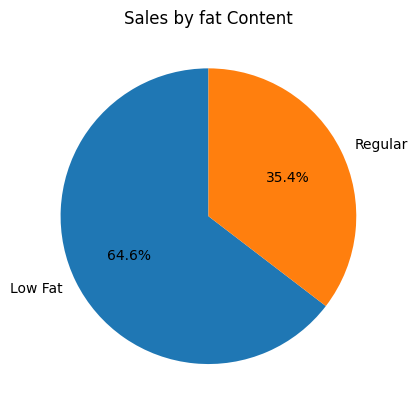

In [10]:
Sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
mpl.pie(Sales_by_fat, 
        labels=Sales_by_fat.index,
        autopct= '%.1f%%',
        startangle=90
       )
mpl.title('Sales by fat Content')
mpl.show()

####  Total Sales by Item type

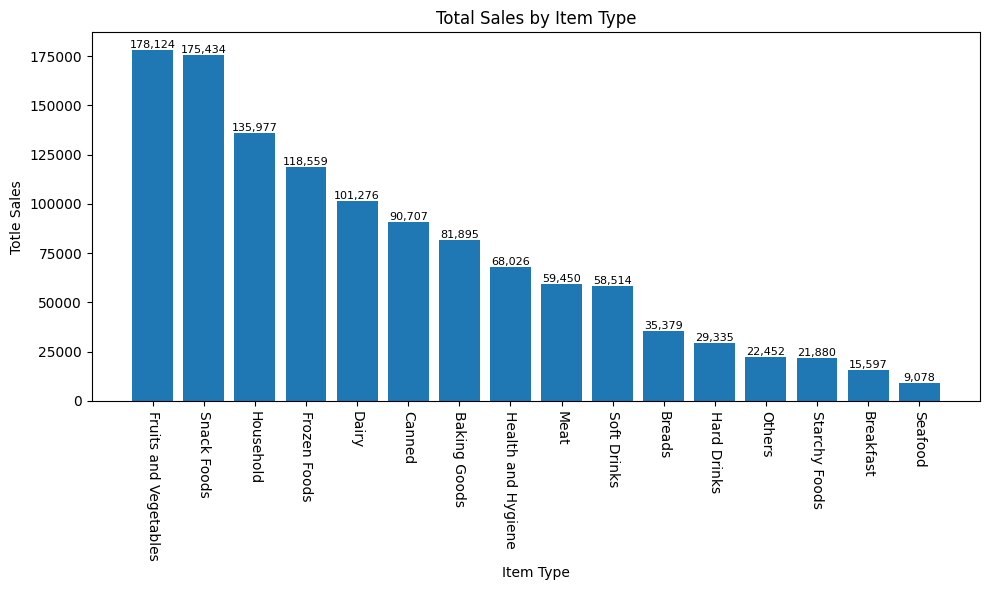

In [11]:
Sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
mpl.figure(figsize=(10,6))  # to fix the size of table 
bars=mpl.bar(Sales_by_type.index,Sales_by_type.values)  # (index = item type , values= sales)

mpl.xticks(rotation=-90)  # show the Item type in -90*
mpl.xlabel('Item Type')  # show x label
mpl.ylabel('Totle Sales')  # show y label
mpl.title('Total Sales by Item Type')  # show title
for i in bars:
    mpl.text(i.get_x() + i.get_width()/2 , i.get_height(), #  ( axis + width/2 , hight of bar)
             f'{i.get_height():,.0f}',ha='center',va='bottom',fontsize=8) #( heightof bar ? , h| , v-, fontsize) 
mpl.tight_layout()  # auto layout 
mpl.show()
           

#### Fat Content by Outlet for Tatal Sales

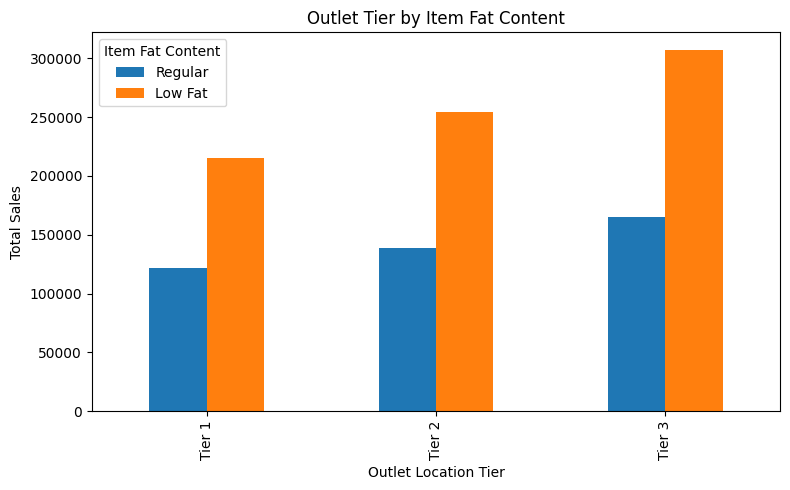

In [12]:
Grouped=df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
Grouped=Grouped[['Regular','Low Fat']]
ax= Grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content') # type of chart , size , title
mpl.xlabel('Outlet Location Tier') # x label
mpl.ylabel('Total Sales')  # y label
mpl.legend(title='Item Fat Content')  # legend
mpl.tight_layout()
mpl.show()

#### Total Sales by Outlet Establishment

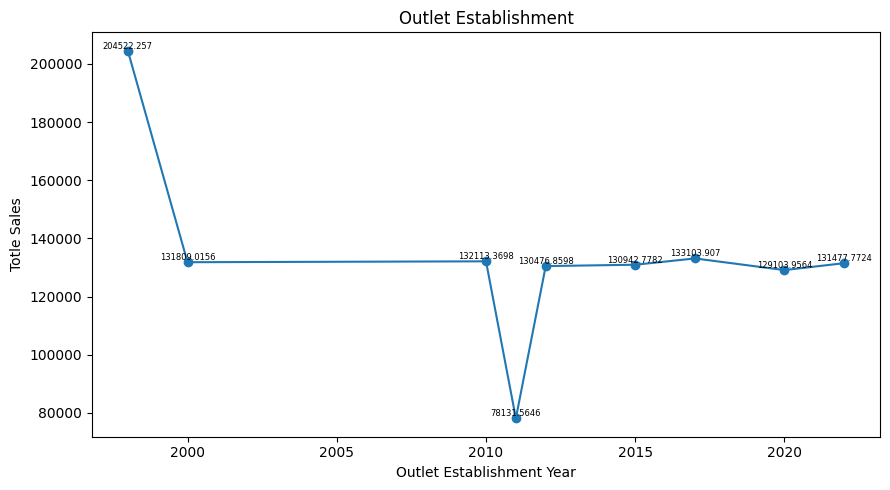

In [13]:
Sales_by_year= df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

mpl.figure(figsize=(9,5))
mpl.plot(Sales_by_year.index,Sales_by_year.values, marker="o")

mpl.xlabel("Outlet Establishment Year")
mpl.ylabel("Totle Sales")
mpl.title("Outlet Establishment")
for x,y in zip(Sales_by_year.index,Sales_by_year.values):
    mpl.text(x,y, f'{y}',ha='center',va='bottom',fontsize=6)
mpl.tight_layout()
mpl.show()

#### Sales by Outlet Size

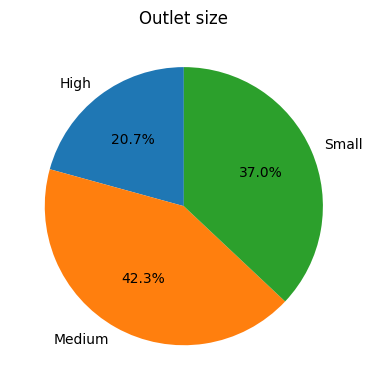

In [14]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
mpl.figure(figsize=(4,4))
mpl.pie(sales_by_size, labels=sales_by_size.index,startangle=90,autopct='%1.1f%%')
mpl.title('Outlet size')
mpl.tight_layout()
mpl.show()

#### Sales by outlet Location

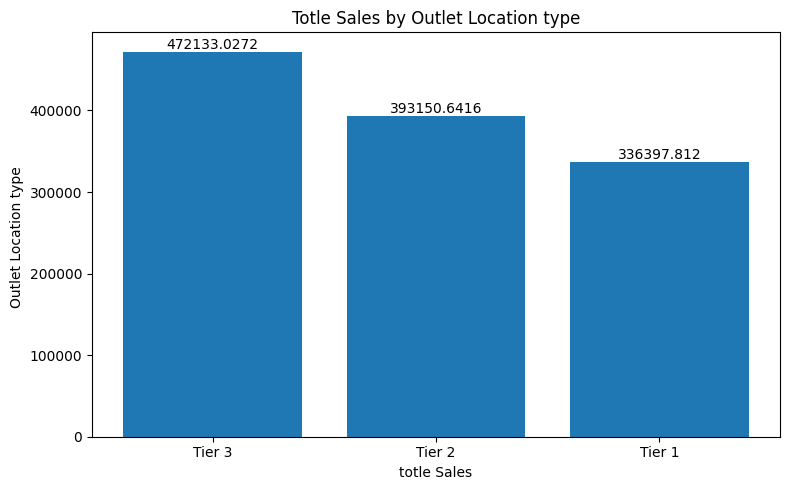

In [15]:
Sale_by_Location= df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
Sale_by_Location=Sale_by_Location.sort_values('Sales',ascending=False)
x=Sale_by_Location['Outlet Location Type']
y=Sale_by_Location['Sales']
mpl.figure(figsize=(8,5))
bars=mpl.bar(x,y) 
mpl.title('Totle Sales by Outlet Location type')
mpl.xlabel('totle Sales')
mpl.ylabel('Outlet Location type ')
for i in bars:
    height=i.get_height()
    mpl.text(i.get_x() + i.get_width() / 2  , height, f'{height}' , ha='center' ,va='bottom' , fontsize=10)
mpl.tight_layout()
mpl.show()